<a href="https://colab.research.google.com/github/affrriiiid/Nexus/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset Loaded Successfully!

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  15

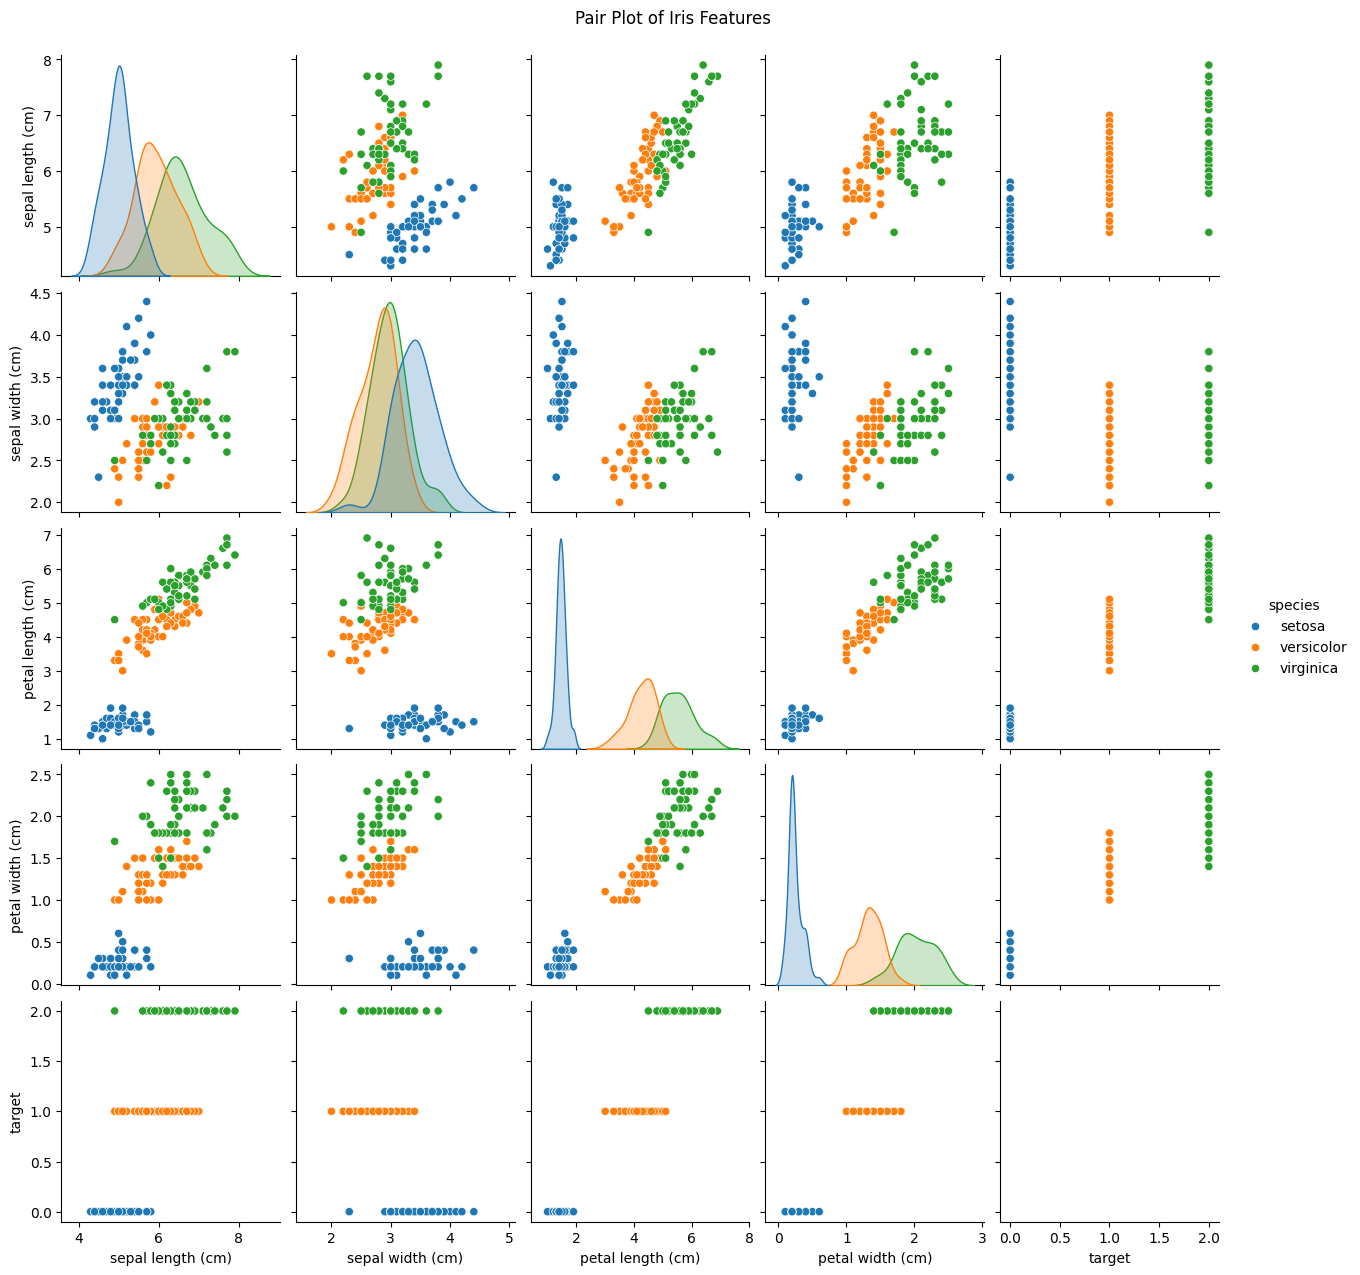

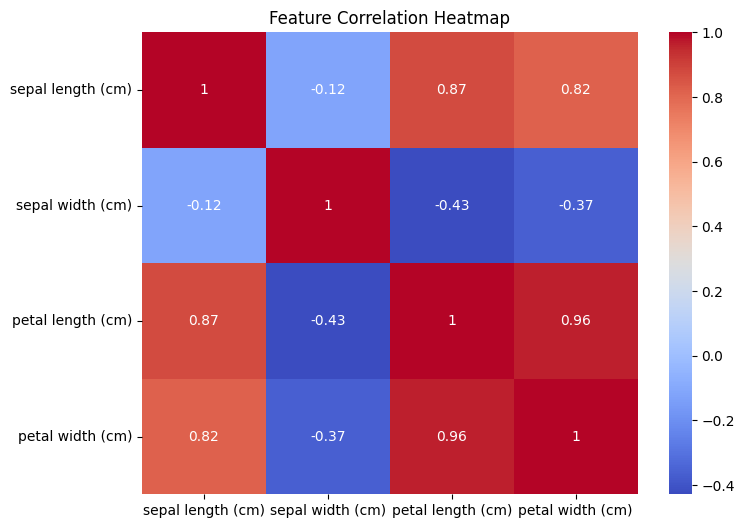


Data split into Train and Test sets:
Training set: (120, 4)
Test set: (30, 4)

Model trained successfully!

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



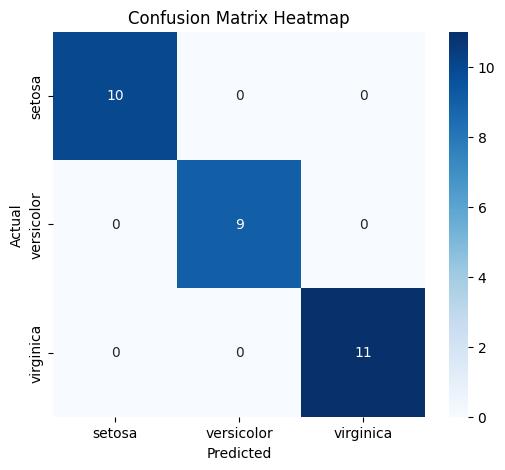

In [1]:
# Iris Dataset Classification - Step-by-Step Guide
# Author: [Your Name]
# Date: [Date]
# Description: Classify iris species using sklearn and visualize results.

# Step 1: Load the Dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create a DataFrame for easy handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Iris Dataset Loaded Successfully!")

# Step 2: Explore the Data
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot to see relationships
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(['target', 'species'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 3: Preprocess the Data
from sklearn.model_selection import train_test_split

# Split features and labels
X = df[iris.feature_names]
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nData split into Train and Test sets:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Step 4: Train the Model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)
print("\nModel trained successfully!")

# Step 5: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 6: Visualize Results (Optional)
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()